# Лабораторная работа №1

### Измерение оптических состояний

### 1.1. Подготовка

Импортируем необходимые библиотеки.

In [1]:
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

from scipy.linalg import expm
import seaborn as sns

Определяем необходимые функции.

In [2]:
def factorial(n):
    fact = 1
    for i in range(0, n, 1):
        fact *= (n - i)
    return fact

In [3]:
def get_poisson(n, mu):
    return ((mu ** n) / factorial(n)) * np.exp(-mu)

Функция, определяющая ошибку моделирования при рассмотрении дефазированного квантового состояния света.

In [4]:
def get_error_poisson(n_max, mu):
    norm = 0
    for n in range(0, n_max + 1, 1):
        norm += get_poisson(n, mu)
    return 1 - norm

Определяем производящую функцию для дефазированного состояния света.

In [5]:
def generating_func_poisson(z, n_max, mu):
    g = 0
    for n in range(0, n_max + 1, 1):
        g += (z ** n) * get_poisson(n, mu)
    return g

Теоретическое значение производящей функции для данного дефазированного состояния света.

In [6]:
def generating_func_poisson_theory(z, mu):
    return np.exp(-mu * (1 - z))

Определяем матрицу оператора уничтожения.

In [7]:
def get_a(n_max):
    a = np.zeros((n_max + 1, n_max + 1), dtype=complex)
    for i in range(0, n_max, 1):
        a[i, i + 1] = np.sqrt(i + 1)
    return a

Определяем матрицу унитарного преобразования.

In [8]:
def get_u_beamsplitter(n_max):
    u = expm((np.pi / 4) * (np.kron(np.conjugate(get_a(n_max)).T, get_a(n_max)) - np.kron(get_a(n_max), np.conjugate(get_a(n_max)).T)))
    return u

Функция, которая возвращает матрицу плотности дефазированного состояния света.

In [9]:
def get_rho_poisson(n_max, mu):
    rho = np.zeros((n_max + 1, n_max + 1), dtype=complex)
    for i in range(0, n_max + 1, 1):
        rho[i, i] = get_poisson(i, mu)
    return rho

Функция, которая возвращает матрицу плотности когерентного состояния света.

In [10]:
def get_rho_coherent(alpha, n_max):
    alpha_state = np.zeros(n_max + 1, dtype=complex)
    for n in range(0, n_max + 1, 1):
        factorial_n = factorial(n)
        alpha_state[n] = (alpha ** n) / math.sqrt(factorial_n)
    alpha_state *= np.exp((-np.abs(alpha) ** 2) / 2)
    rho = np.dot(alpha_state.reshape((n_max + 1, 1)), alpha_state.reshape((1, n_max + 1)).conjugate())
    return rho

Функция, которая возвращает расширенную матрицу плотности дефазированного состояния света (при гомодинном измерении общее число задействованных фотонов выше, чем число фотонов на каждом из входов светоделителя).

In [11]:
def get_rho_poisson_extend(n_max_gomodin, n_max, mu):
    rho = np.zeros((n_max + 1, n_max + 1), dtype=complex)
    for i in range(0, n_max + 1, 1):
        rho[i, i] = get_poisson(i, mu)
    rho_extend = np.zeros((n_max_gomodin + 1, n_max_gomodin + 1), dtype=complex)
    rho_extend[0:n_max + 1, 0:n_max + 1] = rho
    return rho_extend

Функция, которая возвращает расширенную матрицу плотности когерентного состояния света (при гомодинном измерении общее число задействованных фотонов выше, чем число фотонов на каждом из входов светоделителя).

In [12]:
def get_rho_coherent_extend(alpha, n_max_gomodin, n_max_alpha):
    alpha_state = np.zeros(n_max_alpha + 1, dtype=complex)
    for n in range(0, n_max_alpha + 1, 1):
        factorial_n = factorial(n)
        alpha_state[n] = (alpha ** n) / math.sqrt(factorial_n)
    alpha_state *= np.exp((-np.abs(alpha) ** 2) / 2)
    rho = np.dot(alpha_state.reshape((n_max_alpha + 1, 1)), alpha_state.reshape((1, n_max_alpha + 1)).conjugate())
    rho_extend = np.zeros((n_max_gomodin + 1, n_max_gomodin + 1), dtype=complex)
    rho_extend[0:n_max_alpha + 1, 0:n_max_alpha + 1] = rho
    return rho_extend

Функция, которая возвращает матрицу плотности чистого пуассоновского состояния.

In [13]:
def get_rho_pure_poisson(n_max, mu):
    psi = np.zeros(n_max + 1, dtype=complex)
    for i in range(0, n_max + 1, 1):
        psi[i] = np.sqrt(get_poisson(i, mu))
    rho = np.dot(psi.reshape((n_max + 1, 1)), psi.reshape((1, n_max + 1)).conjugate())
    return rho

Функция, которая возвращает расширенную матрицу плотности чистого пуассоновского состояния (при гомодинном измерении общее число задействованных фотонов выше, чем число фотонов на каждом из входов светоделителя).

In [14]:
def get_rho_pure_poisson_extend(n_max_gomodin, n_max, mu):
    psi = np.zeros(n_max + 1, dtype=complex)
    for i in range(0, n_max + 1, 1):
        psi[i] = np.sqrt(get_poisson(i, mu))
    rho = np.dot(psi.reshape((n_max + 1, 1)), psi.reshape((1, n_max + 1)).conjugate())
    rho_extend = np.zeros((n_max_gomodin + 1, n_max_gomodin + 1), dtype=complex)
    rho_extend[0:n_max + 1, 0:n_max + 1] = rho
    return rho_extend

Функция, которая определяет ошибку моделирования при рассмотрении чистого пуассоновского состояния.

In [15]:
def get_error_pure_poisson(n_max, alpha):
    trace = np.trace(get_rho_pure_poisson(n_max, mu)).real
    return 1 - trace

Функция, которая определяет ошибку моделирования при рассмотрении когерентного состояния света.

In [16]:
def get_error_coherent(n_max, alpha):
    trace = np.trace(get_rho_coherent(alpha, n_max)).real
    return 1 - trace

### 1.2. Исследование производящей функции

Определим размерность гильбертова пространства $d$, достаточную для моделирования распределения с ошибкой, не превышающей $10^{−5}$ (для дефазированного пуассоновского состояния света).

In [17]:
mu = 0.27

In [18]:
n_max = 0
error = get_error_poisson(n_max, mu)
while error > 1e-5:
    n_max += 1
    error = get_error_poisson(n_max, mu)
print('n_max = ', n_max)
print('d = ', n_max + 1)

n_max =  4
d =  5


Вычислим и построим производящую функцию распределения по числу фотонов.

In [19]:
z_list = np.linspace(-5, 5, 101)
gen_func_sim = generating_func_poisson(z_list, n_max, mu)
gen_func_theory = generating_func_poisson_theory(z_list, mu)

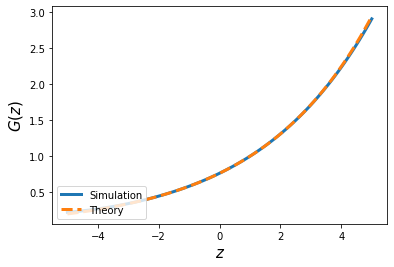

In [20]:
fig, ax = plt.subplots()
plt.plot(z_list, gen_func_sim, lw=3, alpha=1, label='Simulation')
plt.plot(z_list, gen_func_theory, '--', lw=3, alpha=1, label='Theory')
ax.legend(loc='lower left')
ax.minorticks_off()
plt.xlabel(r'$z$', fontsize=15)
plt.ylabel(r'$G(z)$', fontsize=15)
plt.show()

Видно, что размерность гильбертова пространства состояний, которую мы взяли является достаточной для того, чтобы численное и теоретическое значение производящей функции совпадали с хорошей точностью.

### 1.3. Корреляционные измерения

Напишем функцию, которая выполняет пункты $(3)-(5)$.

In [21]:
def get_result_correlation(rho_in, n_max):
    u = get_u_beamsplitter(n_max)
    rho_out = u @ rho_in @ np.conjugate(u).T
    rho_out_tensor = rho_out.reshape([n_max + 1] * 4)
    
    p_n1_n2 = np.zeros((n_max + 1, n_max + 1), dtype=float)
    p_n1 = np.zeros(n_max + 1, dtype=float)
    p_n2 = np.zeros(n_max + 1, dtype=float)
    
    for n1 in range(0, n_max + 1, 1):
        for n2 in range(0, n_max + 1, 1):
            p_n1_n2[n1, n2] = rho_out_tensor[n1, n2, n1, n2].real
    
    rho_out_tensor_n1 = np.trace(rho_out_tensor, axis1=1, axis2=3)
    rho_out_tensor_n2 = np.trace(rho_out_tensor, axis1=0, axis2=2)
    
    for n1 in range(0, n_max + 1, 1):
        p_n1[n1] = rho_out_tensor_n1[n1, n1].real
    for n2 in range(0, n_max + 1, 1):
        p_n2[n2] = rho_out_tensor_n2[n2, n2].real
    
    counts = 1000
    number_of_experiments = 100
    g2_list = []
    for k in range(number_of_experiments):
        n1_counts = np.random.multinomial(counts, p_n1, size=1)
        n2_counts = np.random.multinomial(counts, p_n2, size=1)
        n1_n2_counts = np.random.multinomial(counts, p_n1_n2.reshape(-1), size=1).reshape((n_max + 1, n_max + 1))
        n1_vec = np.linspace(0, n_max, n_max + 1)
        n2_vec = np.linspace(0, n_max, n_max + 1)
        n1_n2_matrix = np.dot(n1_vec.reshape((n_max + 1, 1)), n2_vec.reshape((1, n_max + 1)))
        n1_mean = np.dot(n1_counts, n1_vec) / counts
        n2_mean = np.dot(n2_counts, n2_vec) / counts
        n1_n2_mean = np.dot(n1_n2_counts.reshape(-1), n1_n2_matrix.reshape(-1)) / counts
        g2 = n1_n2_mean / (n1_mean * n2_mean)
        g2_list.append(g2[0])
    
    return p_n1_n2, p_n1, p_n2, g2_list

Определим размерность гильбертова пространства $d$, достаточную для моделирования распределения с ошибкой, не превышающей $10^{−5}$ (для дефазированного пуассоновского состояния света).

In [22]:
n_max = 0
error = get_error_poisson(n_max, mu)
while error > 1e-5:
    n_max += 1
    error = get_error_poisson(n_max, mu)
print('n_max = ', n_max)
print('d = ', n_max + 1)

n_max =  4
d =  5


Выполним пункты $(3)-(5)$ для дефазированного пуассоновского состояния света.

In [23]:
rho_in_poisson_mix = np.kron(get_rho_poisson(n_max, mu), get_rho_coherent(0, n_max))
p_n1_n2_poisson_mix, p_n1_poisson_mix, p_n2_poisson_mix, g2_list_poisson_mix = get_result_correlation(rho_in_poisson_mix, n_max)

Определим размерность гильбертова пространства $d$, достаточную для моделирования распределения с ошибкой, не превышающей $10^{−5}$ (для чистого пуассоновского состояния света).

In [24]:
n_max = 0
error = get_error_pure_poisson(n_max, mu)
while error > 1e-5:
    n_max += 1
    error = get_error_pure_poisson(n_max, mu)
print('n_max = ', n_max)
print('d = ', n_max + 1)

n_max =  4
d =  5


Выполним пункты $(3)-(5)$ для чистого пуассоновского состояния света.

In [25]:
rho_in_poisson_pure = np.kron(get_rho_pure_poisson(n_max, mu), get_rho_coherent(0, n_max))
p_n1_n2_poisson_pure, p_n1_poisson_pure, p_n2_poisson_pure, g2_list_poisson_pure = get_result_correlation(rho_in_poisson_pure, n_max)

Вычисляем среднее значение и стандартное отклонение оценки величины $g^{(2)}$ (Теоретическое значение $g^{(2)}$ для данного квантового состояния равно $1$).

In [26]:
np.array(g2_list_poisson_mix).mean(), np.array(g2_list_poisson_mix).std()

(0.9852958063035578, 0.27573009691291445)

In [27]:
np.array(g2_list_poisson_pure).mean(), np.array(g2_list_poisson_pure).std()

(1.0166913668289013, 0.28975367058060064)

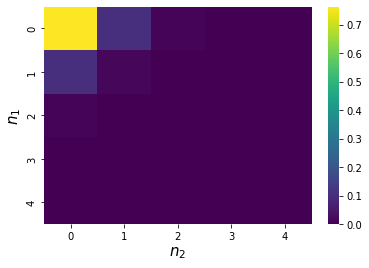

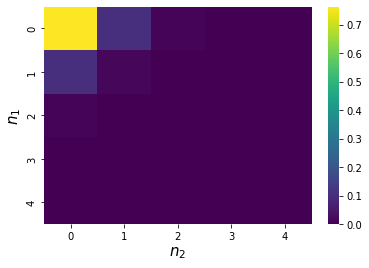

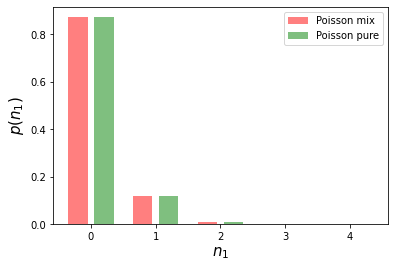

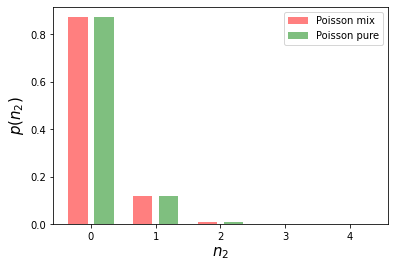

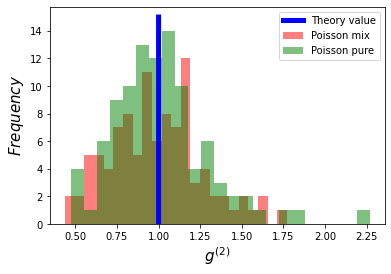

In [28]:
fig, ax = plt.subplots()
ax = sns.heatmap(p_n1_n2_poisson_mix, linewidth=0.0, cmap='viridis')
plt.xlabel(r'$n_2$', fontsize=15)
plt.ylabel(r'$n_1$', fontsize=15)
plt.show()

fig, ax = plt.subplots()
ax = sns.heatmap(p_n1_n2_poisson_pure, linewidth=0.0, cmap='viridis')
plt.xlabel(r'$n_2$', fontsize=15)
plt.ylabel(r'$n_1$', fontsize=15)
plt.show()

fig, ax = plt.subplots()
ax.bar(np.linspace(0, n_max, 5) - 0.2, p_n1_poisson_mix, width=0.3, color='red', alpha=0.5, label='Poisson mix')
ax.bar(np.linspace(0, n_max, 5) + 0.2, p_n1_poisson_pure, width=0.3, color='green', alpha=0.5, label='Poisson pure')
ax.legend(loc='upper right')
plt.xlabel(r'$n_1$', fontsize=15)
plt.ylabel(r'$p(n_1)$', fontsize=15)
plt.show()

fig, ax = plt.subplots()
ax.bar(np.linspace(0, n_max, 5) - 0.2, p_n2_poisson_mix, width=0.3, color='red', alpha=0.5, label='Poisson mix')
ax.bar(np.linspace(0, n_max, 5) + 0.2, p_n2_poisson_pure, width=0.3, color='green', alpha=0.5, label='Poisson pure')
ax.legend(loc='upper right')
plt.xlabel(r'$n_2$', fontsize=15)
plt.ylabel(r'$p(n_2)$', fontsize=15)
plt.show()

fig, ax = plt.subplots()
plt.hist(g2_list_poisson_mix, bins=23, color='red', alpha=0.5, label='Poisson mix')
plt.hist(g2_list_poisson_pure, bins=23, color='green', alpha=0.5, label='Poisson pure')
plt.plot(np.array([1.0 - 0.00001, 1.0 + 0.00001]), np.array([0.0, 15.0]), lw=5, color='blue', label='Theory value')
ax.legend(loc='upper right')
plt.xlabel(r'$g^{(2)}$', fontsize=15)
plt.ylabel(r'$Frequency$', fontsize=15)
plt.show()

Видно, что теоретическое значение для $g^{(2)}$ находится примерно в центре распределения оценок $g^{(2)}$, что говорит о согласии теоретического значения и численного расчёта. Также видно, что корреляционные измерения нечувствительные к фазе квантового состояния.

### 1.4. Гомодинные измерения

Напишем функцию, которая выполняет пункты  (6)−(8) .

In [29]:
def get_result_gomodin(rho_in, n_max_gomodin, theta):
    alpha = 5 * np.exp(1j * theta)
    u = get_u_beamsplitter(n_max_gomodin)
    rho_out = u @ rho_in @ np.conjugate(u).T
    rho_out_tensor = rho_out.reshape([n_max_gomodin + 1] * 4)
    p_n1_n2 = np.zeros((n_max_gomodin + 1, n_max_gomodin + 1), dtype=float)
    for n1 in range(0, n_max_gomodin + 1, 1):
        for n2 in range(0, n_max_gomodin + 1, 1):
            p_n1_n2[n1, n2] = rho_out_tensor[n1, n2, n1, n2].real
    
    n1_n2_counts = np.random.multinomial(1000, p_n1_n2.reshape(-1), size=1).reshape((n_max_gomodin + 1, n_max_gomodin + 1))
    
    x_theta_list = []
    for n_1 in range(0, n_max_gomodin + 1, 1):
        for n_2 in range(0, n_max_gomodin + 1, 1):
            for k in range(0, n1_n2_counts[n_1, n_2], 1):
                x_theta_list.append((n_1 - n_2) / (np.abs(alpha) * math.sqrt(2)))
    
    return p_n1_n2, x_theta_list

##### 1.4.1. Гомодинные измерение $\theta = 0$

Определим размерность гильбертова пространства  𝑑 , достаточную для моделирования распределения с ошибкой, не превышающей  $10^{-5}$ при гомодинном измерении (для дефазированного пуассоновского состояния света, $\theta = 0$).

In [30]:
theta = 0
alpha = 5 * np.exp(1j * theta)

In [31]:
n_max_alpha = 0
error = get_error_coherent(n_max_alpha, alpha)
while error > 1e-5:
    n_max_alpha += 1
    error = get_error_coherent(n_max_alpha, alpha)
print('n_max_alpha = ', n_max_alpha)
print('d_alpha = ', n_max_alpha + 1)

n_max = 0
error = get_error_poisson(n_max, mu)
while error > 1e-5:
    n_max += 1
    error = get_error_poisson(n_max, mu)
print('n_max = ', n_max)
print('d = ', n_max + 1)

n_max_gomodin = n_max + n_max_alpha
print('n_max_gomodin = ', n_max_gomodin)
print('d_gomodin = ', n_max_gomodin + 1)

n_max_alpha =  49
d_alpha =  50
n_max =  4
d =  5
n_max_gomodin =  53
d_gomodin =  54


Выполним пункты $(6)-(8)$ для дефазированного квантового состояния света ($\theta = 0$).

In [32]:
rho_in_poisson_mix = np.kron(get_rho_poisson_extend(n_max_gomodin, n_max, mu), get_rho_coherent_extend(alpha, n_max_gomodin, n_max_alpha))
p_n1_n2_mix_poisson, x_theta_list_mix_poisson = get_result_gomodin(rho_in_poisson_mix, n_max_gomodin, theta)

Определим размерность гильбертова пространства $d$ , достаточную для моделирования распределения с ошибкой, не превышающей $10^{-5}$ при гомодинном измерении (для чистого пуассоновского состояния света, $\theta = 0$).

In [33]:
theta = 0
alpha = 5 * np.exp(1j * theta)

In [34]:
n_max_alpha = 0
error = get_error_coherent(n_max_alpha, alpha)
while error > 1e-5:
    n_max_alpha += 1
    error = get_error_coherent(n_max_alpha, alpha)
print('n_max_alpha = ', n_max_alpha)
print('d_alpha = ', n_max_alpha + 1)

n_max = 0
error = get_error_pure_poisson(n_max, mu)
while error > 1e-5:
    n_max += 1
    error = get_error_pure_poisson(n_max, mu)
print('n_max = ', n_max)
print('d = ', n_max + 1)

n_max_gomodin = n_max + n_max_alpha
print('n_max_gomodin = ', n_max_gomodin)
print('d_gomodin = ', n_max_gomodin + 1)

n_max_alpha =  49
d_alpha =  50
n_max =  4
d =  5
n_max_gomodin =  53
d_gomodin =  54


Выполним пункты $(6)-(8)$ для чистого пуассоновского квантового состояния света ($\theta = 0$).

In [35]:
rho_in_poisson_pure = np.kron(get_rho_pure_poisson_extend(n_max_gomodin, n_max, mu), get_rho_coherent_extend(alpha, n_max_gomodin, n_max_alpha))
p_n1_n2_pure_poisson, x_theta_list_pure_poisson = get_result_gomodin(rho_in_poisson_pure, n_max_gomodin, theta)

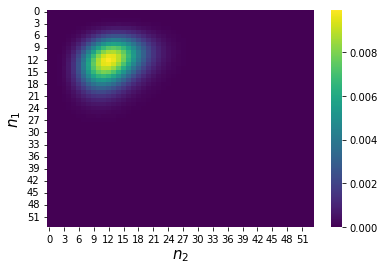

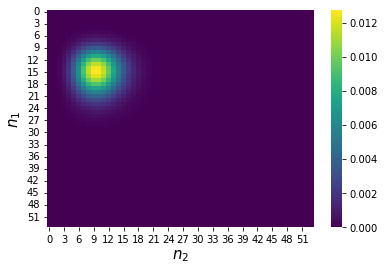

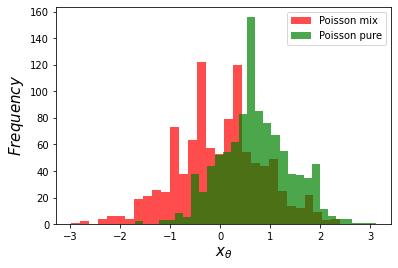

In [36]:
fig, ax = plt.subplots()
ax = sns.heatmap(p_n1_n2_mix_poisson, linewidth=0.0, cmap='viridis')
plt.xlabel(r'$n_2$', fontsize=15)
plt.ylabel(r'$n_1$', fontsize=15)
plt.show()

fig, ax = plt.subplots()
ax = sns.heatmap(p_n1_n2_pure_poisson, linewidth=0.0, cmap='viridis')
plt.xlabel(r'$n_2$', fontsize=15)
plt.ylabel(r'$n_1$', fontsize=15)
plt.show()

fig, ax = plt.subplots()
plt.hist(x_theta_list_mix_poisson, bins=30, color='red', alpha=0.7, label='Poisson mix')
plt.hist(x_theta_list_pure_poisson, bins=30, color='green', alpha=0.7, label='Poisson pure')
ax.legend(loc='upper right')
plt.xlabel(r'$x_{\theta}$', fontsize=15)
plt.ylabel(r'$Frequency$', fontsize=15)
plt.show()

Видно, что гомодинные измерения при $\theta = 0$ чувствительны к фазе квантового состояния.

##### 1.4.2. Гомодинные измерения $\theta = \dfrac{\pi}{2}$

Определим размерность гильбертова пространства $d$, достаточную для моделирования распределения с ошибкой, не превышающей  $10^{-5}$ при гомодинном измерении (для дефазированного пуассоновского состояния света, $\theta = \dfrac{\pi}{2}$).

In [37]:
theta = np.pi / 2
alpha = 5 * np.exp(1j * theta)

In [38]:
n_max_alpha = 0
error = get_error_coherent(n_max_alpha, alpha)
while error > 1e-5:
    n_max_alpha += 1
    error = get_error_coherent(n_max_alpha, alpha)
print('n_max_alpha = ', n_max_alpha)
print('d_alpha = ', n_max_alpha + 1)

n_max = 0
error = get_error_poisson(n_max, mu)
while error > 1e-5:
    n_max += 1
    error = get_error_poisson(n_max, mu)
print('n_max = ', n_max)
print('d = ', n_max + 1)

n_max_gomodin = n_max + n_max_alpha
print('n_max_gomodin = ', n_max_gomodin)
print('d_gomodin = ', n_max_gomodin + 1)

n_max_alpha =  49
d_alpha =  50
n_max =  4
d =  5
n_max_gomodin =  53
d_gomodin =  54


Выполним пункты $(6)-(8)$ для дефазированного квантового состояния света ($\theta = \dfrac{\pi}{2}$).

In [39]:
rho_in_poisson_mix = np.kron(get_rho_poisson_extend(n_max_gomodin, n_max, mu), get_rho_coherent_extend(alpha, n_max_gomodin, n_max_alpha))
p_n1_n2_mix_poisson, x_theta_list_mix_poisson = get_result_gomodin(rho_in_poisson_mix, n_max_gomodin, theta)

Определим размерность гильбертова пространства $d$, достаточную для моделирования распределения с ошибкой, не превышающей $10^{-5}$ при гомодинном измерении (для чистого пуассоновского состояния света, $\theta = \dfrac{\pi}{2}$).

In [40]:
theta = np.pi / 2
alpha = 5 * np.exp(1j * theta)

In [41]:
n_max_alpha = 0
error = get_error_coherent(n_max_alpha, alpha)
while error > 1e-5:
    n_max_alpha += 1
    error = get_error_coherent(n_max_alpha, alpha)
print('n_max_alpha = ', n_max_alpha)
print('d_alpha = ', n_max_alpha + 1)

n_max = 0
error = get_error_pure_poisson(n_max, mu)
while error > 1e-5:
    n_max += 1
    error = get_error_pure_poisson(n_max, mu)
print('n_max = ', n_max)
print('d = ', n_max + 1)

n_max_gomodin = n_max + n_max_alpha
print('n_max_gomodin = ', n_max_gomodin)
print('d_gomodin = ', n_max_gomodin + 1)

n_max_alpha =  49
d_alpha =  50
n_max =  4
d =  5
n_max_gomodin =  53
d_gomodin =  54


Выполним пункты $(6)-(8)$ для чистого пуассоновского квантового состояния света ($\theta = \dfrac{\pi}{2}$).

In [42]:
rho_in_poisson_pure = np.kron(get_rho_pure_poisson_extend(n_max_gomodin, n_max, mu), get_rho_coherent_extend(alpha, n_max_gomodin, n_max_alpha))
p_n1_n2_pure_poisson, x_theta_list_pure_poisson = get_result_gomodin(rho_in_poisson_pure, n_max_gomodin, theta)

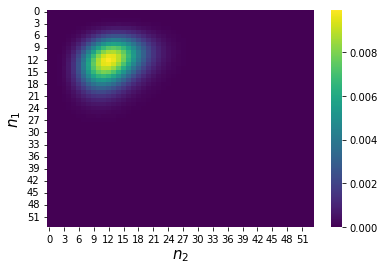

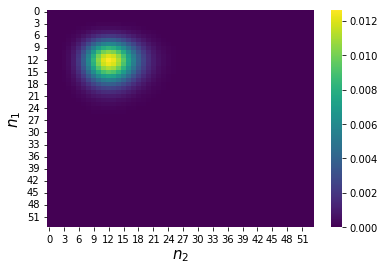

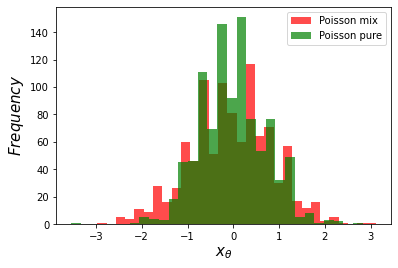

In [43]:
fig, ax = plt.subplots()
ax = sns.heatmap(p_n1_n2_mix_poisson, linewidth=0.0, cmap='viridis')
plt.xlabel(r'$n_2$', fontsize=15)
plt.ylabel(r'$n_1$', fontsize=15)
plt.show()

fig, ax = plt.subplots()
ax = sns.heatmap(p_n1_n2_pure_poisson, linewidth=0.0, cmap='viridis')
plt.xlabel(r'$n_2$', fontsize=15)
plt.ylabel(r'$n_1$', fontsize=15)
plt.show()

fig, ax = plt.subplots()
plt.hist(x_theta_list_mix_poisson, bins=30, color='red', alpha=0.7, label='Poisson mix')
plt.hist(x_theta_list_pure_poisson, bins=30, color='green', alpha=0.7, label='Poisson pure')
ax.legend(loc='upper right')
plt.xlabel(r'$x_{\theta}$', fontsize=15)
plt.ylabel(r'$Frequency$', fontsize=15)
plt.show()

Видно, что распределение $p_{12}(n_1, n_2)$ немного различаются для смешанного и чистого пуассоновского состояния, хотя распределение $x_{\theta}$ получилось примерно одинаковым для $\theta = \dfrac{\pi}{2}$. Из этого тоже можно сделать вывод, что гомодинные измерения чувствительны к фазе квантового состояния.